In [9]:
import os
import struct
import numpy as np

def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' %kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'%kind)

    with open(labels_path,'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype = np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath, dtype = np.uint8).reshape(len(labels),784)
        images = ((images/255.)-.5)*2
    return images, labels

X_train, y_train = load_mnist('',kind='train')
print('Train строк: %d, столбцов: %d'%(X_train.shape[0],X_train.shape[1]))

X_test, y_test = load_mnist('',kind='t10k')
print('Test строк: %d, столбцов: %d'%(X_test.shape[0],X_test.shape[1]))

Train строк: 60000, столбцов: 784
Test строк: 10000, столбцов: 784


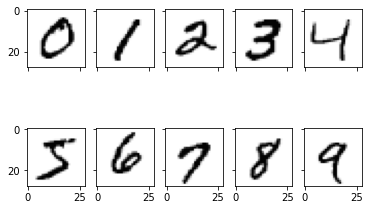

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2,ncols = 5,sharex = True,sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train ==i][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys')
plt.show()

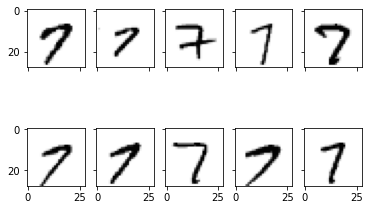

In [21]:
fig, ax = plt.subplots(nrows=2,ncols = 5,sharex = True,sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys')
plt.show()

In [22]:
np.savez_compressed('mnist_scaled.npz',X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

In [29]:
mnist = np.load('mnist_scaled.npz')

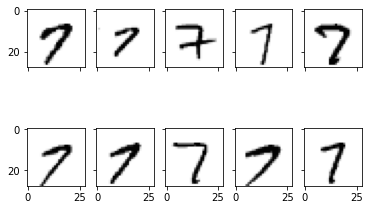

In [30]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]
fig, ax = plt.subplots(nrows=2,ncols = 5,sharex = True,sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys')
plt.show()

In [35]:
from neuro import NeuralNetMLP
nn = NeuralNetMLP(n_hidden = 100, l2 = 0.1,epochs = 200,eta=0.0005,minibatch_size = 100, shuffle = True, seed = 1)

In [36]:
nn.fit(X_train = X_train[:55000], y_train = y_train[:55000], X_valid = X_train[55000:],y_valid=y_train[55000:])

200/200 | Cost: 14702.82 | Train/Valid Acc.: 97.06%/97.46% 